In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
plt.style.use("dark_background")

### Fetching data:

In [2]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1234)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

### Displaying data on 2D plane:

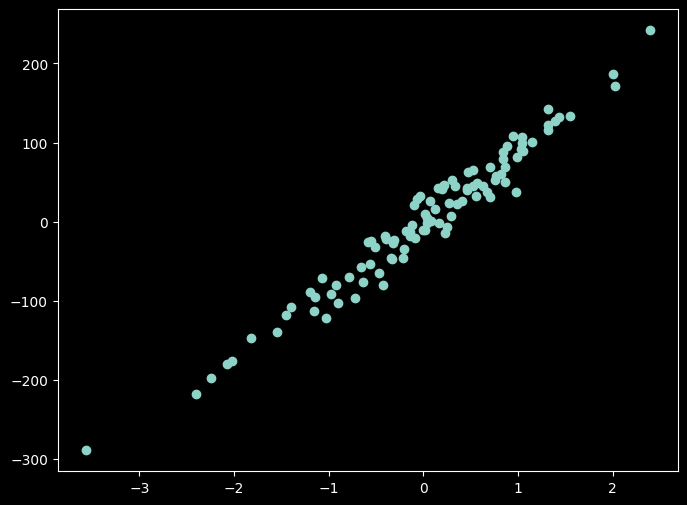

In [3]:
fig=plt.figure(figsize=(8,6))
plt.scatter(X[:,0],y)
plt.show()

on X axis -> independent variables values, 
on Y axis -> dependent variable values

##### Appending 1 to each instance/data point in order to calculate bias:

In [4]:
X_train_n1=X_train.copy()
X_train_n2=X_train.copy()
y_train_n1=y_train.copy()

In [5]:
X_train_m1=[]
X_train_m2=[]
y_train_m1=[]

In [6]:
diff_no=[2,5]

In [7]:
import random
for i,j,k in zip(X_train_n1,X_train_n2,y_train_n1):
    r=random.choice(diff_no)
    p=i*r
    q=j/r
    s=k*r
    X_train_m1.append(p)
    X_train_m2.append(q)
    y_train_m1.append(s)

In [31]:
y_train_m1

[23.628551728866583,
 74.60662939282216,
 49.23089883910339,
 -23.73481008099739,
 233.07169881940888,
 -442.8182970030234,
 -115.25425591170794,
 246.5490115870804,
 374.2371076185973,
 105.57361439456267,
 201.27562484578445,
 632.9568260799474,
 -174.6151366980698,
 -11.975033263722352,
 -183.09482749618078,
 -6.6037588293510225,
 223.32191031895456,
 214.46191887202832,
 90.57098724629685,
 -1445.6349814525581,
 286.49911958525473,
 663.95094200912,
 209.03360540264472,
 443.84869943051086,
 -437.06651096714023,
 -123.30177823657237,
 483.79903645421837,
 -50.662047807717585,
 -232.13590584069658,
 128.230923239822,
 -27.002851085415863,
 -883.6220536611497,
 -93.34716690486466,
 101.13457680588712,
 45.28686414177842,
 -42.180450757190975,
 324.6040620837084,
 -324.355799434499,
 -62.972633576208544,
 -694.8405701275611,
 267.05823373456093,
 244.35855783462318,
 -267.52657065715425,
 342.5197252116646,
 -109.9127219388036,
 -131.80406966306674,
 41.009538691658406,
 -21.362908653

In [8]:
X_train_m1=np.array(X_train_m1)
X_train_m2=np.array(X_train_m2)

In [32]:
X_train_m1

array([[ 1.80709683e-01],
       [ 1.96983968e+00],
       [ 9.14459567e-02],
       [-6.10457874e-01],
       [ 1.07634290e+00],
       [-5.95487847e+00],
       [-1.56325948e+00],
       [ 2.82869153e+00],
       [ 4.01568590e+00],
       [ 6.15937710e-01],
       [ 2.30007145e+00],
       [ 6.95993097e+00],
       [-1.01323162e+00],
       [ 8.22647715e-01],
       [-1.94847267e+00],
       [ 1.97563433e-01],
       [ 3.15989723e+00],
       [ 2.09187651e+00],
       [ 4.23766774e-01],
       [-1.78175833e+01],
       [ 3.83684368e+00],
       [ 7.16353484e+00],
       [ 9.67106882e-01],
       [ 5.29484594e+00],
       [-4.80090727e+00],
       [-2.74121225e+00],
       [ 4.78192103e+00],
       [ 7.84818606e-02],
       [-1.04249382e+00],
       [ 2.02726706e+00],
       [-2.89239017e-01],
       [-1.01062741e+01],
       [-1.99982290e+00],
       [ 1.72743458e+00],
       [ 7.08040664e-01],
       [-1.63894104e-01],
       [ 2.61753984e+00],
       [-2.34652642e+00],
       [-1.0

In [9]:
X_train_augmented1=np.hstack((np.ones((X_train_m1.shape[0], 1)), X_train_m1))
X_train_augmented2=np.hstack((np.ones((X_train_m2.shape[0], 1)), X_train_m2))
X_train_T = X_train_augmented1.T
X_train_T1 = X_train_augmented2.T

### Encrypting data:

In [10]:
from phe import paillier
public_key,private_key=paillier.generate_paillier_keypair()

In [11]:
enc_X_train=[]
for i in X_train_T:
    row_in=[]
    for j in i:
        p=public_key.encrypt(j)
        row_in.append(p)
    enc_X_train.append(row_in)

In [12]:
enc_y_train=[]
for i in y_train_m1:
    p=public_key.encrypt(i)
    enc_y_train.append(p)

### SERVER SIDE CODE:

In [13]:
XTX=[]
for i in enc_X_train:
    row_in=[]
    for j in X_train_T1:
        row_in2=0
        for p,q in zip(i,j):
            t=p*q
            row_in2=row_in2+t
        row_in.append(row_in2)
    XTX.append(row_in)
            

In [14]:
XTY=[]
for i in X_train_T1:
    summation=0
    for p,q in zip(i,enc_y_train):
        t=p*q
        summation=summation+t
    XTY.append(summation)

### CLIENT SIDE CODE:

In [15]:
XTX_dec=[]
for i in XTX:
    row_in=[]
    for j in i:
        p=private_key.decrypt(j)
        row_in.append(p)
    XTX_dec.append(row_in)

In [16]:
XTX_dec

[[80.0, 4.049474984395263], [-31.747891952076632, 82.8846072134051]]

In [17]:
XTX_dec=np.array(XTX_dec)
type(XTX_dec)

numpy.ndarray

In [18]:
XTY_dec=[]
for i in XTY:
    p=private_key.decrypt(i)
    XTY_dec.append(p)
XTY_dec

[-2274.3872534879038, 7245.812909256801]

In [19]:
XTY_dec=np.array(XTY_dec)
type(XTY_dec)

numpy.ndarray

In [20]:
XTX_inv = np.linalg.inv(XTX_dec)
theta = np.dot(XTX_inv, XTY_dec)

### OBTAINED VALUES:

In [21]:
bias = theta[0]
weights = theta[1:]

In [22]:
bias

-32.230029335875315

In [23]:
weights

array([75.07518741])

### Testing:

In [24]:
enc_X_test=[]
for i in X_test:
    row_in=[]
    for j in i:
        p=public_key.encrypt(j)
        row_in.append(p)
    enc_X_test.append(row_in)

In [25]:
enc_X_test[:4]

[[<phe.paillier.EncryptedNumber at 0x157c5472180>],

In [26]:
predictions=[]
for i in enc_X_test:
    pred=0
    for j,k in zip(i,weights):
        p=j*k
        pred=pred+p
    pred=pred+bias
    predictions.append(private_key.decrypt(pred))

In [27]:
predictions

[-13.626983500004906,
 -80.01715072347766,
 2.6343115009831664,
 42.2405041961569,
 -200.6000225820922,
 9.31950062644892,
 -99.58424306750312,
 -22.86718095876245,
 -10.5263976868977,
 -26.509330998118795,
 -101.76874551726124,
 20.67700360930228,
 34.37389467455844,
 20.640036672985595,
 -58.11340247004967,
 3.1630539349312246,
 45.38275440954666,
 -137.48343619409025,
 66.95222233934987,
 30.908863560492247]

### Comparing actual values with Predicted values: (Actual Value - Predicted Value)

In [28]:
for a,b in zip(y_test,predictions):
    print(a,b)

-6.400439740897028 -13.626983500004906
-75.83288846408419 -80.01715072347766
43.02438482670904 2.6343115009831664
81.72162477765585 42.2405041961569
-197.9801503584435 -200.6000225820922
32.09705138165424 9.31950062644892
-102.66748011552487 -99.58424306750312
15.35071412820563 -22.86718095876245
6.892323119468568 -10.5263976868977
26.28851287900197 -26.509330998118795
-80.36899984455164 -101.76874551726124
30.84591703151775 20.67700360930228
95.06862969774186 34.37389467455844
69.43879729019481 20.640036672985595
-45.80868282540775 -58.11340247004967
63.18804079600157 3.1630539349312246
91.41603362148403 45.38275440954666
-108.37740214379002 -137.48343619409025
142.75464960351508 66.95222233934987
87.77205622112535 30.908863560492247


### Calculating Mean Square Error of Predicted Values:

In [29]:
def mse(y_test, enc_predictions):
    return np.mean((y_test-enc_predictions)**2)

mse = mse(y_test,predictions)
print(mse)

1533.6626052718486


### Displaying Predicted vs Actual Values on 2D plane:

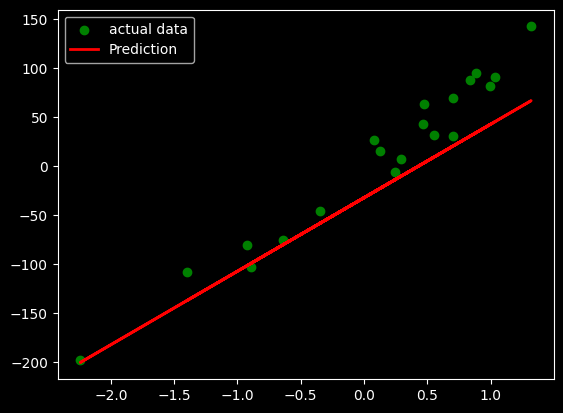

In [30]:
plt.scatter(X_test,y_test,color='green',label='actual data')
plt.plot(X_test,predictions,color='red',linewidth=2,label='Prediction')
plt.legend()
plt.show()

### Conclusion:

The linear regression model was trained on Paillier encrypted data. The weights and bias obtained from the following model (the Paillier encrypted model) are approximately equal to the weights and bias of the model that was trained on plain data (as observed in the ‘Linear_Reg_with_Plain.ipynb’ file). After training this model using encrypted data, we tested it against the testing data (which is also encrypted in Paillier). The results of the encrypted testing data are almost equal the results of the plain testing data (observed in the ‘Linear_Reg_with_Plain.ipynb’ file).